In [2]:
from IPython.display import Image
from IPython.display import HTML
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import math

In [15]:
iterations = 10
numExec = 5
percMelhor = np.zeros((numExec, iterations))
#equações
A = np.array([[3,2,4],[1,1,2],[4,3,-2]])
#valores de b
b = np.array([1,2,3])
def avaliar(eq):
    p = np.matmul(A.data,eq) # resultados estimados
    prc = (abs(b-p)/b)*100 # caso algum p seja 0, 0 até 1 significa 0% mais perto do valor correto
    return np.mean(prc)
ms = np.arange(numExec*iterations*3)# guarda a melhor sequencia (o mapeamento com a porcentagem é feito com percMelhor)
melhorSeq = np.reshape(ms, (numExec, iterations, 3))
values = 20*npr.random_sample((50,3))-10
for i in range(0, numExec):
    for j in range(0, iterations):
        seq = np.zeros(50)
        # avalia todas as sequências
        for k, e in enumerate(values):
            seq[k] = avaliar(e)
        nseq = np.argsort(seq)# ordenando da melhor pra pior (retorna os índices para mapeamento)
        percMelhor[i, j] = seq[nseq[0]]
        melhorSeq[i, j] = values[nseq[0]]
        for n in nseq:
            if seq[n]>50:
                values[n]=20*npr.random_sample((1,3))-10   

Execução 0
Execução 1
Execução 2
Execução 3
Execução 4


## Exibição dos Resultados

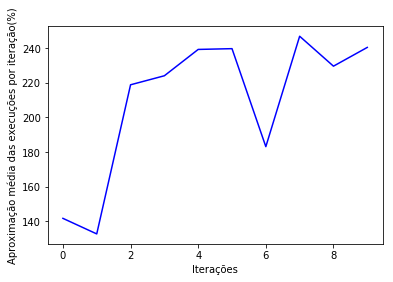

In [22]:
meanMelhor = np.zeros(( iterations ))
for iteration in np.arange(0, np.shape(percMelhor)[ 1 ]):
    meanMelhor[ iteration ] = np.mean( percMelhor[ :, iteration ] )
#mostrar o resultado de cada execução
meanExec = np.zeros((numExec))
for e in np.arange(0, np.shape(percMelhor)[0]):
    meanExec[e] = np.mean(percMelhor[e])
plt.xlabel("Iterações")
plt.ylabel("Aproximação média das execuções por iteração(%)")
plt.plot(np.arange(iterations),meanMelhor,'b-')

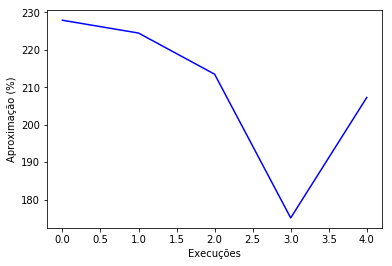

In [23]:
plt.xlabel("Execuções")
plt.ylabel("Aproximação (%)")
plt.plot(np.arange(numExec),meanExec,'b-')